In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#set initials
x10,x1f,y10,y1f = 0,5,0,5
v0,vf=0.5,0.5
tht0,thtf=-np.pi/2,-np.pi/2
T = 15
#dt=0.1
dt=0.01
#A matrix for differential flat trajectory
A = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [1, T, T**2, T**3, 0, 0, 0, 0],
    [0, 1, 2*T, 3*T**2, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, T, T**2, T**3],
    [0, 0, 0, 0, 0, 1, 2*T, 3*T**2]
])

#b vector elements for differential flatness trajectory
z10=x10
z20=y10
zdot_10=v0*np.cos(tht0)
zdot_20=v0*np.sin(tht0)
z1f=x1f
z2f=y1f
zdot_1f=vf*np.cos(thtf)
zdot2f=vf*np.sin(thtf)

In [3]:
A_inv = np.linalg.pinv(A)


b = np.array([z10, zdot_10, z20, zdot_20, z1f, zdot_1f, z2f, zdot2f])

alpha = np.linalg.solve(A, b)

t= np.arange(0, 15.1, dt)

#trajectory equations
z1 = alpha[0] + alpha[1] * t + alpha[2] * t**2 + alpha[3] * t**3
z2 = alpha[4] + alpha[5] * t + alpha[6] * t**2 + alpha[7] * t**3
z1_dot = alpha[1]  + 2 * alpha[2] * t + 3 * alpha[3] * t**2
z2_dot = alpha[5]  + 2 * alpha[6] * t + 3 * alpha[7] * t**2
z1_dotdot = 2 * alpha[2] + 6 * alpha[3] * t
z2_dotdot = 2 * alpha[6] + 6 * alpha[7] * t

x = z1
y = z2
x_dot = z1_dot
y_dot = z2_dot
x_dotdot = z1_dotdot
y_dotdot = z2_dotdot



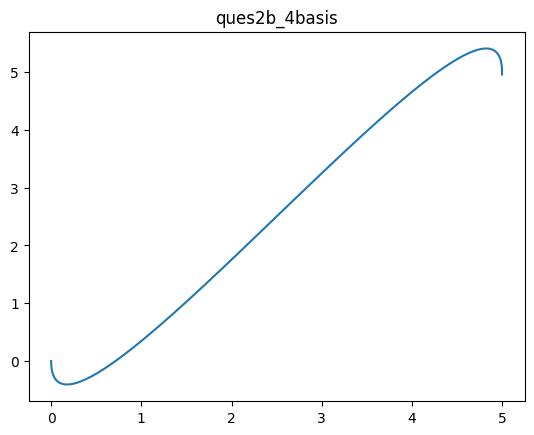

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x,y)
plt.title("ques2b_4basis")
plt.show()

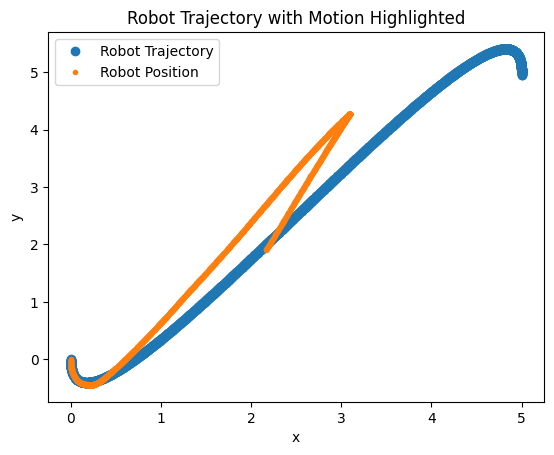

In [20]:
#------------------------------------------------------------------------------
#                       Question 3 starts here
# Set matrices as 0
x_d = np.zeros((len(t),))
y_d = np.zeros((len(t),))
V = np.zeros((len(t),))
theta = np.zeros((len(t),))

# Set initial conditions
x_d[0] = x10
y_d[0] = y10
V[0] = v0
theta[0] = tht0

for i in range(0, len(t)-1,1):
    b2 = np.array([x_dotdot[i], y_dotdot[i]])
    # Calculate control variables using matrix inversion
    A2 = np.array([[np.cos(theta[i]), -V[i] * np.sin(theta[i])],
                   [np.sin(theta[i]), V[i] * np.cos(theta[i])]])
    A2_inv = np.linalg.pinv(A2)
    controls = np.dot(A2_inv,b2)

    #controls variables
    a_t = controls[0]
    w_t = controls[1]

    # Update state variables using Euler's method
    x_d[i+1] = x_d[i] + dt * V[i] * np.cos(theta[i])
    y_d[i+1] = y_d[i] + dt * V[i] * np.sin(theta[i])
    V[i+1] = V[i] + dt * a_t + np.random.normal(0,0.01)
    theta[i+1] = theta[i] + dt * w_t + np.random.normal(0,0.001)
    # Plot the trajectory and position
    #fig = plt.figure()
    #ax = fig.add_subplot(1, 1, 1)
    #ax.plot(x, y, linestyle='', marker='o', label="Robot Trajectory")  # Trajectory
    #ax.plot(x_d, y_d, linestyle='', marker='o', label="Robot Position")  # Robot position
    #plt.title("Robot Trajectory + Robot Position")
    #plt.xlabel("x")
    #plt.ylabel("y")
    #plt.legend()
    #plt.show()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y, linestyle='', marker='o', label="Robot Trajectory")  # Trajectory
ax.plot(x_d, y_d, linestyle='', marker='.', label="Robot Position")  # Mark every 2nd point
plt.title("Robot Trajectory with Motion Highlighted")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()